In [112]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from matplotlib import pyplot as plt

import seaborn as sns
sns.set()

In [113]:
import os

for dirname, _, filenames in os.walk('D:/Python/Kaggle竞赛/泰坦尼克幸存者/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


D:/Python/Kaggle竞赛/泰坦尼克幸存者/code.ipynb
D:/Python/Kaggle竞赛/泰坦尼克幸存者/gender_submission.csv
D:/Python/Kaggle竞赛/泰坦尼克幸存者/result.csv
D:/Python/Kaggle竞赛/泰坦尼克幸存者/test.csv
D:/Python/Kaggle竞赛/泰坦尼克幸存者/Titanic.py
D:/Python/Kaggle竞赛/泰坦尼克幸存者/train.csv
D:/Python/Kaggle竞赛/泰坦尼克幸存者/.ipynb_checkpoints\code-checkpoint.ipynb


In [114]:
train = pd.read_csv("/Python/Kaggle竞赛/泰坦尼克幸存者/train.csv")
test = pd.read_csv("/Python/Kaggle竞赛/泰坦尼克幸存者/test.csv")

In [115]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [116]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Age有空值
* 只显示了可以计算的内容

In [117]:
train.describe(include=['O'])
# 大写的O

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Harper, Rev. John",male,347082,G6,S
freq,1,577,7,4,644


In [118]:
train.info()
# 进一步获取信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [119]:
train.isnull().sum()
# 统计下是否是空

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [120]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [121]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [122]:
test.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kink, Miss. Maria",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [123]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [124]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [125]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]
print("Survived: {} ({:.2f}%)".format(len(survived), len(survived) / len(train) * 100))
print("Not Survived: {} ({:.2f}%)".format(len(not_survived), len(not_survived) / len(train) * 100))
print("Total: {}".format(len(train)))

Survived: 342 (38.38%)
Not Survived: 549 (61.62%)
Total: 891


In [126]:
train.Pclass.value_counts()
# 按照pclass划分统计

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [127]:
# print survive percent of this three different class [1， 2， 3]
for pclass in train.Pclass.value_counts().index:
    print("Class {} 's survival percent: {:.2f}%".format(pclass, 
        len(survived[survived['Pclass'] == pclass])/len(train) * 100))

Class 3 's survival percent: 13.36%
Class 1 's survival percent: 15.26%
Class 2 's survival percent: 9.76%


In [128]:
pclass_survival = train.groupby('Pclass').Survived.value_counts()
pclass_survival

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived'>

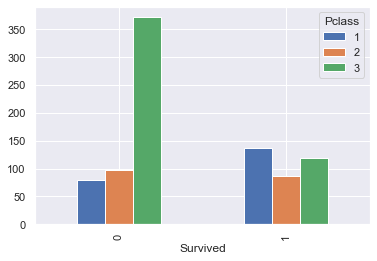

In [129]:
pclass_survival.unstack(level=0).plot(kind='bar', subplots=False)

<AxesSubplot:xlabel='Pclass'>

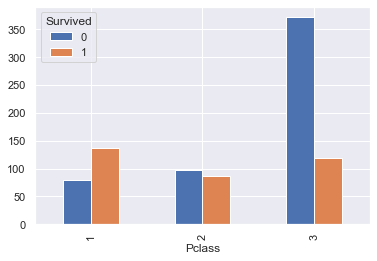

In [130]:
pclass_survival.unstack(level=1).plot(kind='bar', subplots=False)

class 3' s bascial number is the largest

In [131]:
pclass_survival_pos = train[['Survived', 'Pclass']].groupby('Pclass', as_index=False).mean()
pclass_survival_pos

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:>

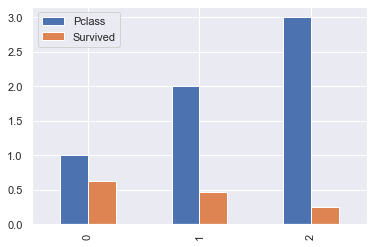

In [132]:
pclass_survival_pos.plot(kind='bar', subplots=False)

Obviously! , higher class level may be more likely to survived

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

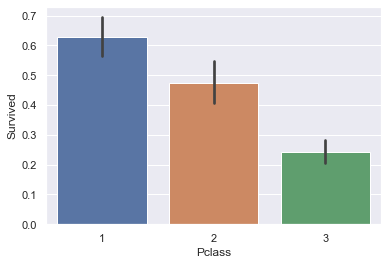

In [133]:
sns.barplot(x='Pclass', y='Survived', data=train)

In [134]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

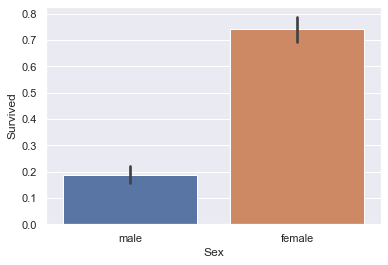

In [135]:
sns.barplot(x='Sex', y='Survived', data=train)

* Female may be more likely to be survived

In [136]:
sex_survival = train.groupby("Sex").Survived.value_counts()
sex_survival

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [137]:
sex_survival_average = train[['Survived', 'Sex']].groupby('Sex', as_index=False).mean()
sex_survival_average

,Sex,Survived
0,female,0.742038
1,male,0.188908


<AxesSubplot:>

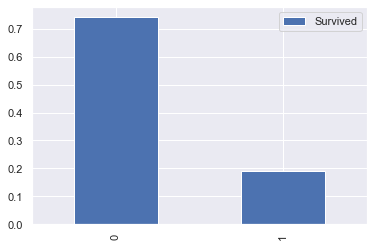

In [138]:
sex_survival_average.plot(kind='bar', )

Female have more posibility to be survived

In [139]:
tab = pd.crosstab(train['Pclass'], train['Sex'])
# crosstab
tab

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


Text(0, 0.5, 'Number')

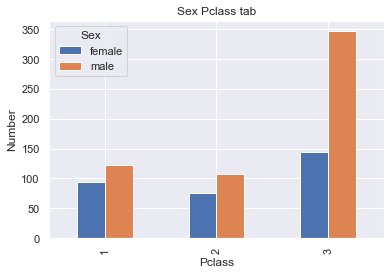

In [140]:
tab.plot(kind='bar', title='Sex Pclass tab')

plt.ylabel('Number')

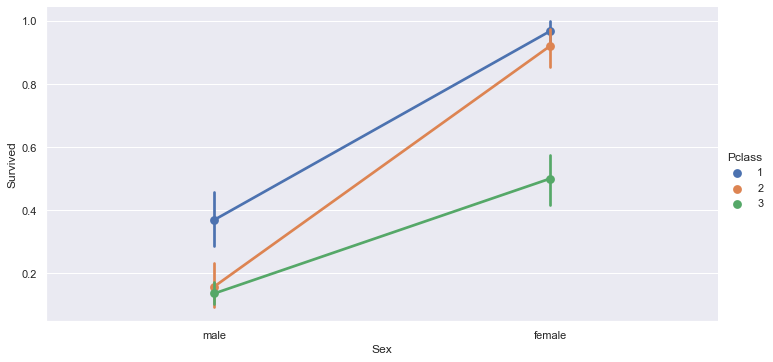

In [141]:
sns.factorplot('Sex', 'Survived', hue='Pclass', size=5, aspect=2, data=train)

一等票基本都100%存活， 二三等票男性几乎20%存活

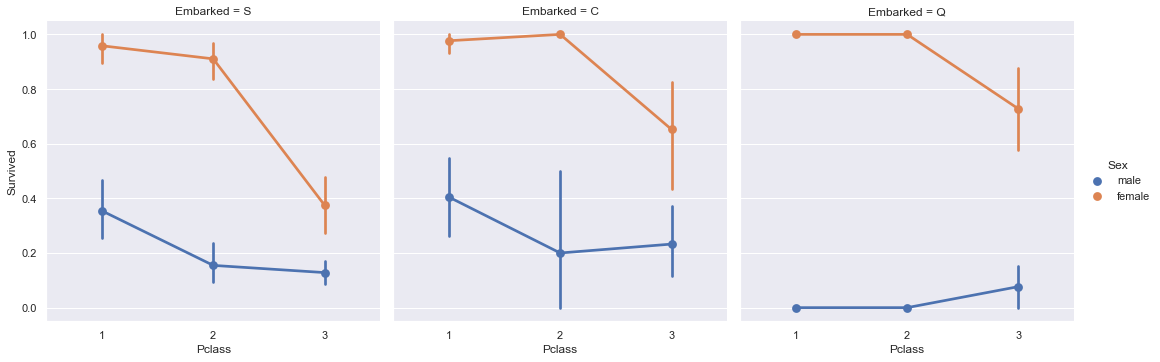

In [145]:
sns.factorplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=train)

Q: Embarked class‘s possibility is best

<AxesSubplot:>

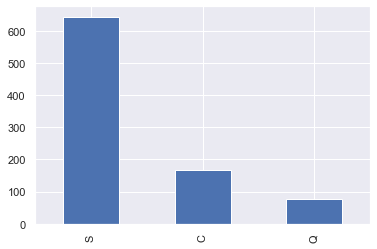

In [150]:
train.Embarked.value_counts().plot(kind='bar')

In [157]:
rmbarked_survival = train.groupby('Embarked').Survived.sum()

In [158]:
rmbarked_survival

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Embarked'>

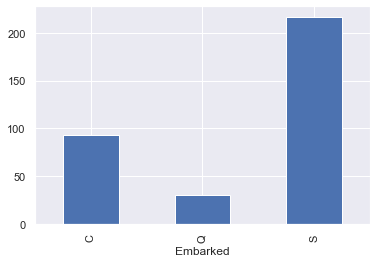

In [159]:
rmbarked_survival.plot(kind='bar')

In [163]:
rmbarked_survival_average = train[['Survived', 'Embarked']].groupby('Embarked').mean()
rmbarked_survival_average

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

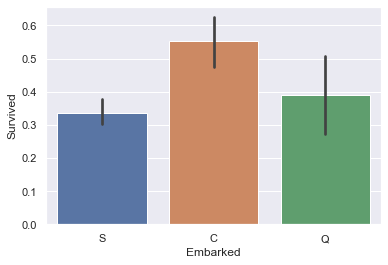

In [167]:
sns.barplot(x='Embarked', y='Survived', data=train)

Embarked == 4 have higher pos to survive

In [169]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch,Survived'>

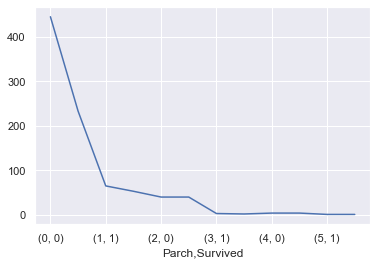

In [173]:
train.groupby('Parch').Survived.value_counts().plot()

In [178]:
parch_train = train[['Parch', 'Survived']].groupby('Parch').Survived.mean()

<AxesSubplot:xlabel='Parch'>

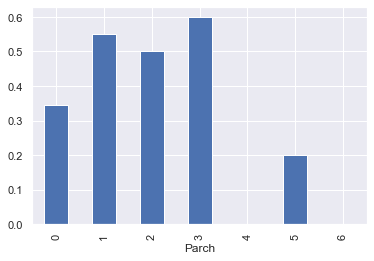

In [181]:
parch_train.plot(kind='bar')

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

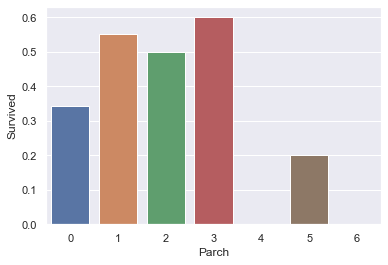

In [184]:
sns.barplot(x='Parch', y='Survived', data=train, ci=None)
# ci = None can hide error col

<AxesSubplot:xlabel='Sex', ylabel='Age'>

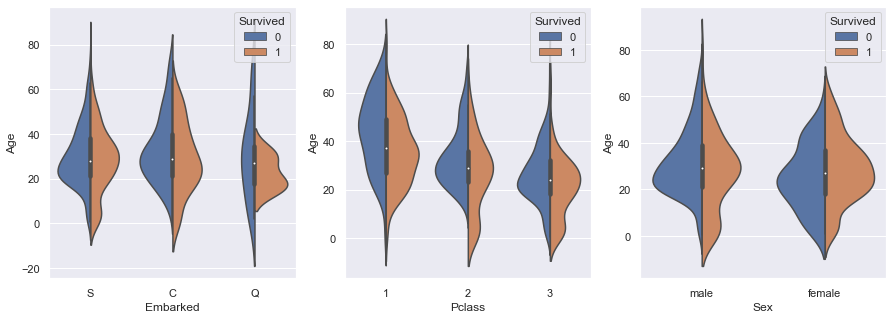

In [192]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

sns.violinplot(x='Embarked', y='Age', split=True, data=train, hue='Survived', ax=ax1)
sns.violinplot(x='Pclass', y='Age', split=True, data=train, hue='Survived', ax=ax2)
sns.violinplot(x='Sex', y='Age', split=True, data=train, hue='Survived', ax=ax3)
